# A 1D diffusion model

Here we develop a one-dimensional model of diffusion. It assumes constant diffusivity. 
It uses a regular grid.
It has fixed boundary conditions.

The diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$
The discretized version of the diffusion equation that we'll solve with our model:
$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the explicit FTCS scheme as described in Slingerland and Kump (2011). (Or see Wikipedia.)

We will use two libraries, Numpy (for arrays) and Matplotlib (for plotting) that aren't a part of the base Python distribution.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Set two fixed model paramters, the diffusivity and the size of the model domain.

In [3]:
D = 100
Lx = 300

Next, set up the model grid using a NumPy array.

In [8]:
dx = 0.5
x = np.arange(start=0,stop=Lx,step=dx)
nx = len(x)
#this creates the grid space

In [6]:
whos

Variable   Type       Data/Info
-------------------------------
D          int        100
Lx         int        300
dx         float      0.5
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
nx         int        600
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x          ndarray    600: 600 elems, type `float64`, 4800 bytes


In [9]:
#subscripting an array
#first element of array, start counting at zero
x[0]

np.float64(0.0)

In [11]:
x[nx-1] #starts counting at zero

np.float64(299.5)

In [12]:
x[-1]

np.float64(299.5)

In [14]:
x[0:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Set the initial concentration profile for the model. 
The concentration `C` is a step function
with a high value on the left,
a low value on the right,
and the step at the center of the domain.

In [17]:
C = np.zeros_like(x) #zeros func makes an array of 
#zeros, zeros_like func makes an array of zeros that is 
#like another array
C_left = 500
C_right = 0
C[x <= Lx//2] = C_left
C[x > Lx//2] = C_right

Plot the initial profile.

Text(0.5, 1.0, 'Initial concentration profile')

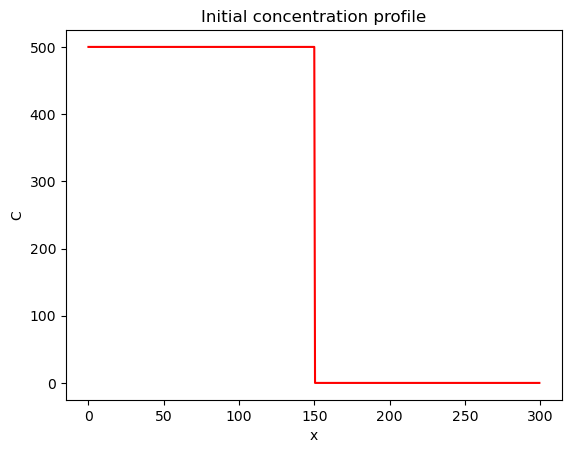

In [18]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial concentration profile")

Set the start time of the model and the number of time steps. Calculate a stable time step for the model using a stability criterion.

In [21]:
time = 0
nt = 5000
dt = 0.5 * (dx**2 / D) #** is a power (squared)

In [22]:
dt

0.00125

Loop over the time steps of the model, solving the diffusion equation using the FTCS explicity scheme described above.
The boundary conditions are fixed, so reset them at each time step.

In [28]:
for t in range(0, nt): #this is a for loop which executes a statement or group of statements a set number of times. 
    C += D * dt / dx**2 * (np.roll(C, -1) - 2*C + np.roll(C,1))
    #D = 100, Lx = 300, dx = 0.5, 
    #dt = 0.5 x dx (0.5)^2 / D (100)
    #C = empty array made to look like x (+= initial value of C + function)
    #np.roll shifts to right or left (-1 = left, 1 = right)
    C[0] = C_left
    C[-1] = C_right

Plot the result

Text(0.5, 1.0, 'Final concentration profile')

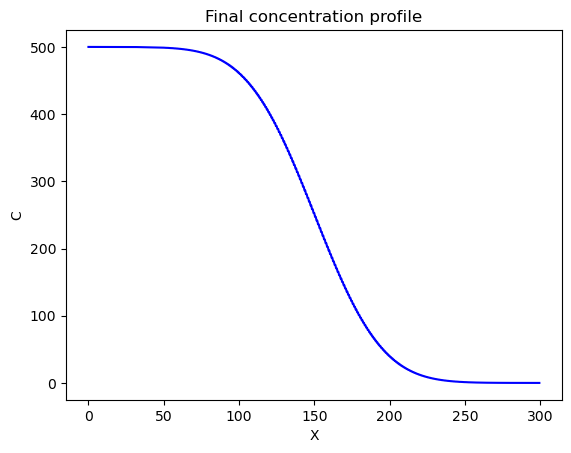

In [24]:
plt.figure()
plt.plot(x, C, "b")
plt.xlabel("X")
plt.ylabel("C")
plt.title("Final concentration profile")

In [25]:
z = np.arange(5)
z

array([0, 1, 2, 3, 4])

In [26]:
np.roll(z, -1)

array([1, 2, 3, 4, 0])

In [27]:
np.roll(z, 1)

array([4, 0, 1, 2, 3])